In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


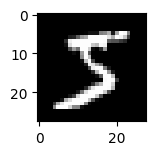

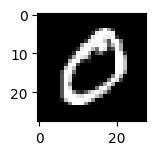

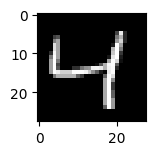

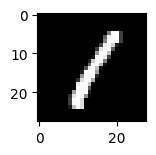

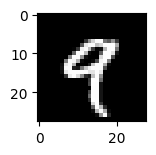

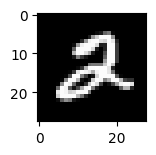

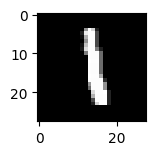

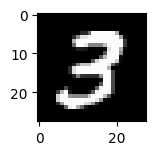

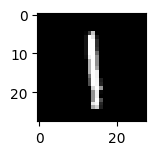

In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
import tensorflow as tf


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


train_dataset = tf.data.Dataset.from_tensor_slices((train_X, train_y))
test_dataset = tf.data.Dataset.from_tensor_slices((test_X, test_y))


def preprocess(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

train_dataset = train_dataset.map(preprocess).shuffle(buffer_size=60000).batch(32)
test_dataset = test_dataset.map(preprocess).batch(32)



model.fit(train_dataset, epochs=5)


loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy:', accuracy)
print("Loss", loss)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8584 - loss: 0.4811
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9556 - loss: 0.1492
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9684 - loss: 0.1065
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9739 - loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9774 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9718 - loss: 0.0887
Test accuracy: 0.9764999747276306
Loss 0.07509641349315643


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
tf.Tensor([7 2 1 0 4 1 4 9 5 9], shape=(10,), dtype=int64)
[7 2 1 0 4 1 4 9 5 9]


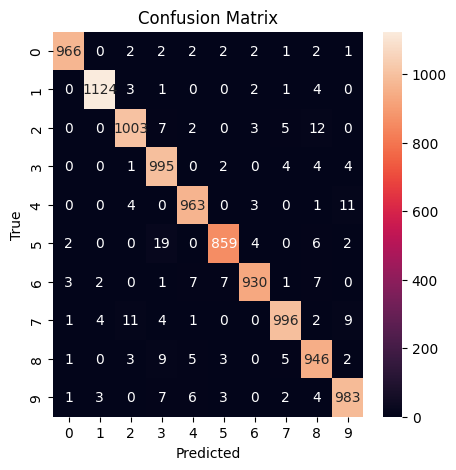

In [ ]:
predictions = model.predict(test_dataset)



predicted_classes = tf.argmax(predictions, axis=1)


print(predicted_classes[:10])
print(test_y[:10])

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_y, predicted_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()